# Objetivo

Este trabalho visa obter insights através dos dados de como está o mercado de Data Science e o que ele esta requerendo. A ideia a priri era obter insights a cerca de salários e skills demandadas, até a coleta dos dados não se tinha com clareza  que tipo de análise exatamente seria feita. Com esse intuito preilimar coletou-se os dados das mais diversas fontes, tais como kaagle, glassdoor, h1bdata e medley. Os links de onde foram baixados os dataset podem ser encontrados abaixo e categorizados segundo uma inspeção preliminar:


<br/>


- Salaries Around World: O conjunto de dados nessa categoria envolve datasets com mesmo esquema. Eles possuem dados sobre o ano de coleta do dado, o tipo a modalidade empregatícia, salários na moeda local, salarios em dolar, proporção de tempo em regime remoto, onde fica sede da compania ,o tamanho da compania e finalmente o local de residência do empregado.

    - *AI/ML Salaries* : https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries 
    - *Data Science Jobs Analysis*: https://www.kaggle.com/datasets/niyalthakkar/data-science-jobs-analysis
    - *Data Jobs 2023*: https://www.kaggle.com/datasets/dinarkhan/data-jobs-2023 
    
    <br/>

 - Jobs Descriptions: Esse conjunto de dados foi coletado visando analisar quais são as skills que mais aparecem nas descrições de vagas de trabalho. Os dataset possuem squemas diferentes, mas ambos foram coletados com o intuito de  somente utilizar a coluna equivalente ao cargo de trabalho e a descrição:

    - *Data Scientist Jobs* - GlassDoor: https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs?datasetId=778775&sortBy=voteCount : Possui o cargo de trabalho ofertado na vaga, aonde a vaga foi postada, a compania que postou a vaga e a descrição do job. 
    
    <br/>

    - *2023 Data Scientists Job Descriptions* : https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions :  Esse dataset é bem mais amplo, além de possuir o título do job e sua descrição ele possui o nnome da compahia, seu lucro, sua avalição na plataforma glassdoor e o setor de atuação daquela compahia.  De fato poderia-se fazer fazer uma análise mais rica com esse dataset, mas por questões de escopo de projeto apenas utilizou-se as columnas relativas ao título do job, a descrição e o setor em que a companhia atua com a finalidade de obter um insight de qual setores estão mais empregando. 
    
    <br/>



- Jobs mapping Skills: Nessa categoria temos o mapeamento de habilidades por job, são listados ao todo  16 habilidades onde um empregado. Cada linha desse dataset equivale a um empregado num determinado posto, que respondeu sua posição em relação a aquela habilidade.

    - *IT Career Proficiency Dataset*: https://data.mendeley.com/datasets/kzt6h7pz97 
    
    <br/>
    

- H1Bdata: Esses dataset foi obtido a partir de uma adpatação de um script de  web scrapping em  "https://github.com/yiuhyuk/ds_salary_h1b/blob/master/h1b_salary.ipynb". O código adpatado pode ser encontrando na classe       ```H1bdataWebScrapper.py``` e sua implementação no script  ```h1bdata_web_scrapping.py``` ambos presensente nesse repositório. Nesse datasset temos  o nome da compania em que está o job, o título do job, o salário em dolar, a data de postagem, a cidade e o estado americano correspondente.


Por fim valem duas observações. 

-> A primeira em relação  aos dataset, os datasets das categorias `Jobs Descriptions`,  `Jobs mapping Skills` e `H1Bdata` correpondem a dados coletados relativo ao território dos EUA, portanto a vasta maioria dos dados aqui coletados diz respeito ao Estados Unidos, pois a vasta maioria dos dados disponíveis gratuitos correspondem ao território dos EUA. Por isso daremos ênfase a ánalise em território americano.

-> A segunda é em relação a implementação do pré-processamento. Durante a pós-graduação de ciência de dados e analytics aprendemos diversos conceitos de engenharia de software e Pogração orientada a objetos. Com o intuito de implementar os conceitos aprendidos nessas disciplinas na prática, implementou-se o pré-processamento segmentado em classes, então utilizaremos  o package  `PreProcessing` para performar as principais tarefas de pre-processamento.

Dadas as devidas descrições, mãos a obra !



# Extração de insights do mercado de trabalho e o que ele está requerendo nos últimos anos

In [1]:
#Setup to run on Colab
"""
from google.colab import drive
import os
import warnings
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Code/')
warnings.filterwarnings('ignore')
"""

"\nfrom google.colab import drive\nimport os\nimport warnings\ndrive.mount('/content/gdrive')\nos.chdir('/content/gdrive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Code/')\nwarnings.filterwarnings('ignore')\n"

In [2]:

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from ComposeData.CsvReader import CsvReader
from Env.Constants import *

warnings.filterwarnings('ignore')



## Merging Dos dados 

Como fora mencionado na descrição os dados relativos a categoria "`Salaries Around world`" possuem o mesmo esquema, exatamente por isso é foi realizado um trabalho de concatenar esse datasets num único dataset claro tendo o cuido de eliminar os duplicados para retirar redudância no dataset resultante da composição. Para isso construi-se a classe `Concatenator` cuja implementação  de concatenação de dados  pode ser vista a seguir: 

In [3]:
#Even it works I doesn't looks weel, I would like to replace that for something more elegant.


from ComposeData.Concatenator import Concatenator
from Env.ProjectPaths import DATASET_PATH


#Instantiate Classes

#Readers

csv_reader1 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/data_science jobs_salaries_world.csv")
csv_reader2 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/data_science_salaries_around_world.csv")
csv_reader3 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/ds.salaries.csv")
csv_reader4 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/salaries.csv")

#Concatenator

Concatenator = Concatenator()


#Load data

df_salaries_around_world1 = csv_reader1.load_data()
df_salaries_around_world2 = csv_reader2.load_data()
df_salaries_around_world3 = csv_reader3.load_data()
df_salaries_around_world4 = csv_reader4.load_data()


#Cocatenate

dfs_salaries_around_world = [df_salaries_around_world1, df_salaries_around_world2, df_salaries_around_world3, df_salaries_around_world4]
salaries_around_world = Concatenator.process_data(data=dfs_salaries_around_world)

#Save on to analyse Output

salaries_around_world.to_csv(DATASET_PATH + "Salaries_around_world/Composed_data/salaries_around_world.csv")

## Avaliação preliminar dos dados

In [4]:
# LoadData
from Env.ProjectPaths import *

salaries_around_world_df = CsvReader(file_path = SALARIES_WORLD_COMPSED_DATASET_PATH).load_data()
h1bdata_df = CsvReader(file_path = H1BDATA_DATASET_PATH).load_data()
job_description_df = CsvReader(file_path = KAGGLE_JOB_DESCRIPTIONS_DATASE_PATHT).load_data()
skills_mapping_df = CsvReader( file_path= SKILLS_MAPPING_DATASET_PATH).load_data()



### Salaries Around World

In [5]:
salaries_around_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 1052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2370 non-null   int64 
 1   experience_level    2370 non-null   object
 2   employment_type     2370 non-null   object
 3   job_title           2370 non-null   object
 4   salary              2370 non-null   int64 
 5   salary_currency     2370 non-null   object
 6   salary_in_usd       2370 non-null   int64 
 7   employee_residence  2370 non-null   object
 8   remote_ratio        2370 non-null   int64 
 9   company_location    2370 non-null   object
 10  company_size        2370 non-null   object
dtypes: int64(4), object(7)
memory usage: 222.2+ KB


In [6]:
salaries_around_world['employee_residence'].value_counts()

US    1558
GB     187
IN      89
CA      79
DE      61
      ... 
MD       1
MK       1
BA       1
AM       1
KW       1
Name: employee_residence, Length: 76, dtype: int64

Primeira coisas que percebemos. O dataset não é representativo para todos os países, mesmo concatenando todos os datasets disponíveis. A imensa maioria dos registro correspondem as empregos nos EUA, o dataset se mostra representativo para os 5 primeiros países com mais registros. Então só consideraremos os 5 países com mais registros nesse dataset.

Além disso...

In [7]:
salaries_around_world_df['employment_type'].value_counts()

FT    2331
PT      21
CT       9
FL       9
Name: employment_type, dtype: int64

A imensa maioria do dataset corresponde a  vínculo empregatício FULL time. Logo os outros tipos de vínculos também não são representativos e devem ser eliminados.

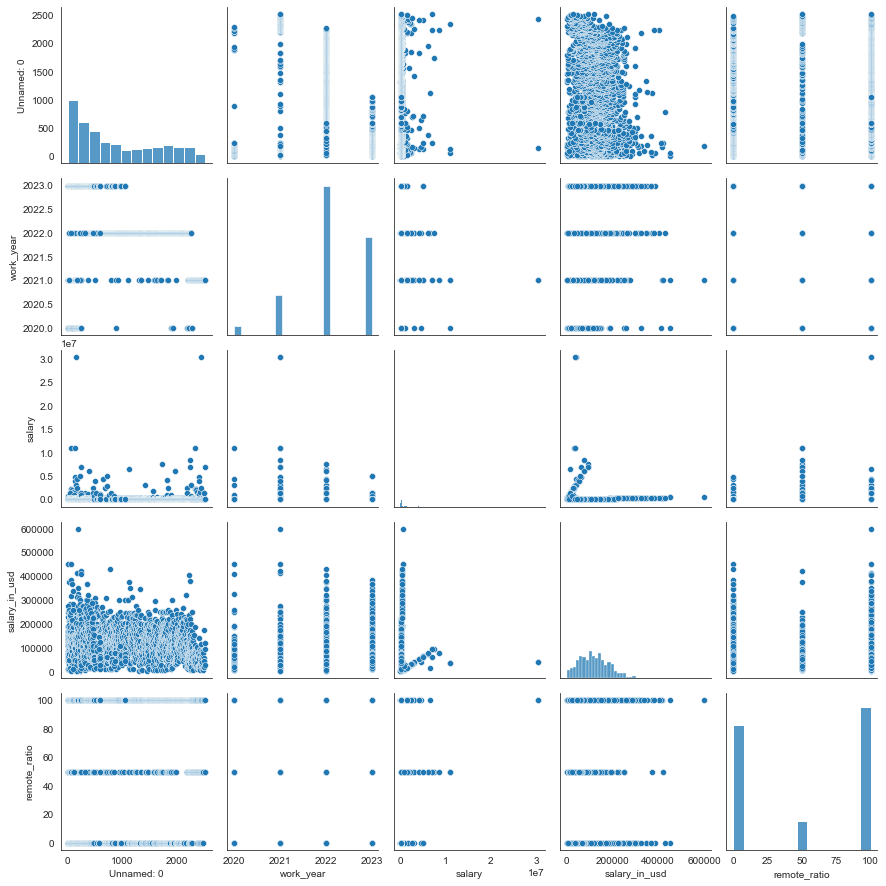

In [8]:
sns.set_style("white")
sns.pairplot(salaries_around_world_df, diag_kind= 'auto' )

Nesse dataset só tem uma variável numérica que nos interessa, que é "salary_in_usd", vamos analisa-la mais a fundo.

<AxesSubplot:ylabel='Density'>

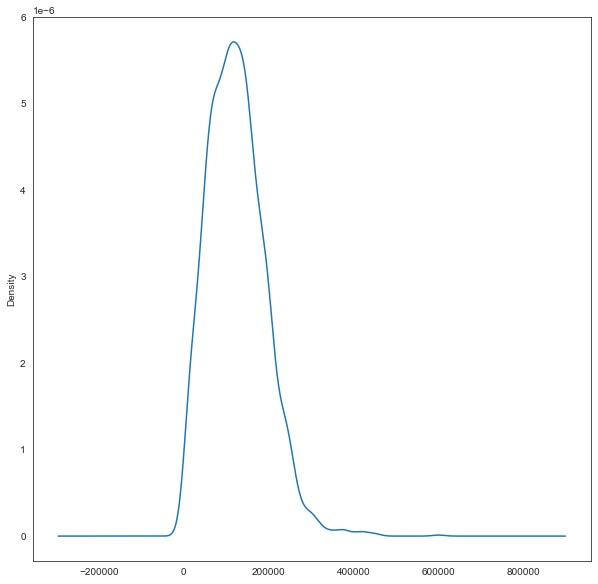

In [9]:
fig = plt.figure( figsize= (10,10))
fig.set_facecolor('white')

salaries_around_world_df['salary_in_usd'].plot(kind='density')


Visualmente  a  variáveil relativa ao salário parece ter distribuição normal. Contudo  esssa distribuição não está refletindo a linha de análise, pois para nossa linha de análise é interessante considerar a distribuição pelo título do job.

<AxesSubplot:>

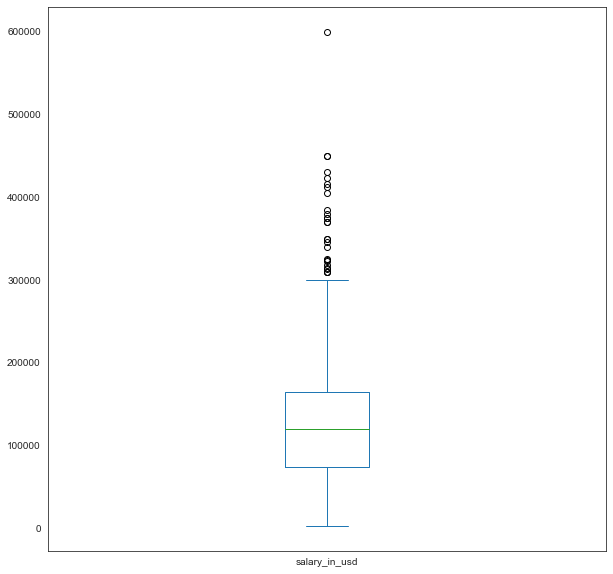

In [10]:
fig = plt.figure( figsize= (10,10))
fig.set_facecolor('white')

salaries_around_world_df['salary_in_usd'].plot(kind='box')

De forma absoluta parece haver alguns outliers, trateremos disso mais adiante.

Contudo havemos de observar um pequeno detalhes:

In [11]:
salaries_around_world_df['salary_in_usd']

0        64369
1        68428
2        85000
3       230000
4       125000
         ...  
2365     37665
2366     75455
2367     63285
2368     58417
2369     46246
Name: salary_in_usd, Length: 2370, dtype: int64

A coluna salarios está em int64, é interessante que essa coluna seja um float por representar um valor monetário.

Analise  dos títulos de jobs

In [12]:
salaries_around_world_df['job_title'].unique()

array(['Data Science Consultant', 'Data Scientist',
       'Head of Data Science', 'Head of Data',
       'Machine Learning Engineer', 'Data Analytics Manager',
       'Research Scientist', 'Data Analyst', 'Data Engineer',
       'Data Science Engineer', 'Manager Data Science',
       'Data Engineering Manager', 'AI Scientist',
       '3D Computer Vision Researcher', 'ML Engineer',
       'Applied Data Scientist', 'Director of Data Science',
       'Data Analytics Engineer', 'Lead Data Analyst', 'BI Data Analyst',
       'Machine Learning Scientist',
       'Machine Learning Infrastructure Engineer',
       'Marketing Data Analyst', 'Lead Data Engineer',
       'Director of Data Engineering',
       'Computer Vision Software Engineer', 'Financial Data Analyst',
       'Cloud Data Engineer', 'Principal Data Analyst',
       'Big Data Architect', 'Lead Data Scientist', 'Data Architect',
       'Big Data Engineer', 'Staff Data Scientist',
       'Data Science Manager', 'Business Data Anal

Como podemos ver temos muitos títulos para trabalhos, muitos deles podem ser simplificados, então temos uma primeira tarefas simplificar os postos de trabalho nesse dataset.
Mas essa não é a única subsituição a fazer, note que outra colunas também devem passar por esse tipo de transformação afim de fazer com a informação contida nela fique mais clara:



In [13]:
salaries_around_world_df[['experience_level','employee_residence','company_location', 'company_size']].head(10)

,experience_level,employee_residence,company_location,company_size
0,EN,DE,DE,L
1,SE,GR,US,L
2,EX,RU,RU,M
3,EX,RU,RU,L
4,EN,US,US,S
5,SE,US,US,M
6,MI,US,US,M
7,MI,FR,FR,L
8,MI,AT,AT,L
9,SE,CA,CA,L


Sendo assim outro pre-processamento a se fazer é realizar substituições nessas colunas com a finalidade de torna-la mais claras e explícitas.

Tendo preliminarmente  analisado esse dataset temos então listados todo o pré-processamento que será feito a priori. Assim sendo vamos realizar-lo

In [14]:
import subprocess

subprocess.run(['python', 'setup.py'], capture_output=True, text=True)


CompletedProcess(args=['python', 'setup.py'], returncode=1, stdout='', stderr='usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]\n   or: setup.py --help [cmd1 cmd2 ...]\n   or: setup.py --help-commands\n   or: setup.py cmd --help\n\nerror: no commands supplied\n')

In [15]:
from Preprocessing.TransformData.DataReplacer import  DataReplacer
from Preprocessing.CleanData.DataFilter import DataFilter
from Preprocessing.TransformData.DataTypeConversor import DataTypeConversor
from Preprocessing.PreProcessing import PreProcessing


In [16]:
#Salaries around world preprocessing

#Replacing if contains






jobs = ["ANALYST", "DATA ENGINEER", "DATA SCIENTIST", "MACHINE LEARNING ENGINEER", "ARCHITECT", "DATA SCIENCE", "DATA ANALYTICS"]
salaries_world_replacing_if_contains = DataReplacer(task="IFCONTAINSREPLACNING", on_col='job_title', values=jobs)


# map replace

map = {
    "ANALYST": "DATA ANALYST",
    "DATA ANALYTICS": "DATA ANALYST",
    "DATA SCIENCE": "DATA SCIENTIST",
    "ANALYTICS ENGINEER": "DATA ANALYST",
    "ETL DEVELOPER": "DATA ENGINEER",
    "ARCHITECT" : "DATA ARCHITECT",
    "COMPUTER VISION ENGINEER":"MACHINE LEARNING ENGINEER",
    "DEEP LEARNING ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING INFRASTRUCTURE ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING SOFTWARE ENGINEER":"MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING DEVELOPER": "MACHINE LEARNING ENGINEER",
    "COMPUTER VISION SOFTWARE ENGINEER": "MACHINE LEARNING ENGINEER",
    "MACHINE LEARNING MANAGER": "MACHINE LEARNING ENGINEER",
    "HEAD OF MACHINE LEARNING" : "MACHINE LEARNING ENGINEER",
    "ML ENGINEER":"MACHINE LEARNING ENGINEER",
    "MLOPS ENGINEER":"MACHINE LEARNING ENGINEER",
    "NLP ENGINEER":"MACHINE LEARNING ENGINEER",
    "AI DEVELOPER": "MACHINE LEARNING ENGINEER",
    "AI SCIENTIST":"RESEACHER",
    "APPLIED SCIENTIST":"RESEACHER",
    "APPLIED MACHINE LEARNING SCIENTIST":"RESEACHER",
    "3D COMPUTER VISION RESEARCHER":"RESEACHER",
    "DEEP LEARNING RESEARCHER":"RESEACHER",
    "MACHINE LEARNING RESEARCH ENGINEER":"RESEACHER",
    "MACHINE LEARNING RESEARCHER":"RESEACHER",
    "RESEARCH ENGINEER":"RESEACHER",
    "RESEARCH SCIENTIST":"RESEACHER",
    "MACHINE LEARNING SCIENTIST": "RESEACHER",
    "HEAD OF DATA": "CHIEF DATA OFFICER",
    "CLOUD DATABASE ENGINEER":"DATABASE ENGINEER"
    
}


salaries_world_map_replacing_jobs = DataReplacer(task="MAPREPLACING", on_col='job_title', map=map)

#filter non-full time

salaries_world_filter_no_fulltime = DataFilter(filter_by="FILTER_NOT_EQUAL_VALUE",  col="employment_type", by_value="FT")

# map replace contry abrevitations

map = CsvReader(file_path=DATASET_PATH + "Salaries_around_world/maps/countries_map.csv").load_data()
map = dict(map.values)
salaries_world_map_replace_contries_abv_er = DataReplacer(task="MAPREPLACING", on_col='employee_residence', map=map)
salaries_world_map_replace_contries_abv_cl = DataReplacer(task="MAPREPLACING", on_col='company_location', map=map)


#map replace expirience level
map={
    "EN": "ENTRY-LEVEL",
    "EX": "EXPIRIENCED",
    "MI": "MID-LEVEL",
    "SE": "SENIOR-LEVEL"
}
salaries_world_map_replace_experience_level =  DataReplacer(task = "MAPREPLACING", on_col='experience_level', map=map)


#map replace company_size
map={
    "L": "LARGE-SIZE",
    "M": "MEDIUM-SIZE",
    "S": "SMALL-SIZE",
}
salaries_world_map_replace_company_size =  DataReplacer(task = "MAPREPLACING", on_col='company_size', map=map)
# filter job_titles less freq than 4

salaries_world_filter_less_freq = DataFilter(filter_by="FREQ_LOWER_THAN_VALUE", col='job_title', by_value= 4)


#convert salaries to float

salaries_world_convert_salaries_usd_float = DataTypeConversor(to_type="TO_FLOAT", col="salary_in_usd")



#Salaries Around world prepropcessing
print("**************************************************************")
print("Iniciating Pre-Processing on salaries__around_worl\n")

salaries_world_preprocessors = [ 
                                salaries_world_replacing_if_contains, salaries_world_map_replacing_jobs, salaries_world_map_replace_experience_level, salaries_world_filter_no_fulltime, \
                                salaries_world_map_replace_contries_abv_er, salaries_world_map_replace_contries_abv_cl, \
                                salaries_world_map_replace_company_size, salaries_world_filter_less_freq,
                                salaries_world_convert_salaries_usd_float
                                
                            ]
salaries_world_preprocessing =  PreProcessing( pre_processors= salaries_world_preprocessors)
salaries_world_around_df_preprocessed = salaries_world_preprocessing.process_data(salaries_around_world)
print("salaries__around_worl Preprocessing Completed Sucessfully. ")
print("************************************************************** \n")

**************************************************************
Iniciating Pre-Processing on salaries__around_worl

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 

Perform Data conversion... 
Data conversion DONE !

salaries__around_worl Preprocessing Completed Sucessfully. 
************************************************************** 



Vamos então checar o novo arquivo:

In [17]:
salaries_world_around_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 1052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2325 non-null   int64  
 1   experience_level    2325 non-null   object 
 2   employment_type     2325 non-null   object 
 3   job_title           2325 non-null   object 
 4   salary              2325 non-null   int64  
 5   salary_currency     2325 non-null   object 
 6   salary_in_usd       2325 non-null   float64
 7   employee_residence  2325 non-null   object 
 8   remote_ratio        2325 non-null   int64  
 9   company_location    2325 non-null   object 
 10  company_size        2325 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 218.0+ KB


Se os países são os top 5 mais frequentes:

In [18]:
salaries_world_around_df_preprocessed['employee_residence'].value_counts()

UNITED STATES OF AMERICA                                1549
UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND     187
INDIA                                                     84
CANADA                                                    78
GERMANY                                                   58
                                                        ... 
BULGARIA                                                   1
CHINA                                                      1
IRAN                                                       1
NEW ZEALAND                                                1
KUWAIT                                                     1
Name: employee_residence, Length: 73, dtype: int64

Queremos somente os 5 mais frequentes:

In [19]:
#filter top 5 most frequent countries
country_freq_threshold= salaries_world_around_df_preprocessed['employee_residence'].value_counts()[4]

salaries_world_filter_top_5_most_freq =  DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value=country_freq_threshold, col='employee_residence')
salaries_world_around_df_preprocessed = salaries_world_filter_top_5_most_freq.process_data(salaries_world_around_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [20]:
salaries_world_around_df_preprocessed['employee_residence'].value_counts()

UNITED STATES OF AMERICA                                1549
UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND     187
INDIA                                                     84
CANADA                                                    78
GERMANY                                                   58
Name: employee_residence, dtype: int64

como mencionado anteriomente é mais interessante olhar para os dados de salários por categorias, como fizemos a simplificação dos títulos dos jobs então conseguimos analisar a faixa de salários por categoria

In [21]:
salaries_world_around_df_preprocessed['job_title'].value_counts()

DATA SCIENTIST                  543
DATA ENGINEER                   498
DATA ANALYST                    442
MACHINE LEARNING ENGINEER       236
RESEACHER                       129
DATA ARCHITECT                   55
DATA MANAGER                     16
BI DEVELOPER                     11
DATA SPECIALIST                   9
DATA OPERATIONS ENGINEER          6
DATABASE ENGINEER                 4
DATA INFRASTRUCTURE ENGINEER      4
CHIEF DATA OFFICER                3
Name: job_title, dtype: int64

Apesar da simplificação realizada, percebemos temos quantidade não significativa para determinados títulos de jobs, nesse caso vamos pegar  o top 6 mais frequente

In [22]:
freq_job_title_treshold = salaries_world_around_df_preprocessed['job_title'].value_counts()[5]

filter_less_freq_job_titles = DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value= freq_job_title_treshold , col='job_title')
salaries_world_around_df_preprocessed = filter_less_freq_job_titles.process_data(salaries_world_around_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [23]:
salaries_world_around_df_preprocessed['job_title'].value_counts()

DATA SCIENTIST               543
DATA ENGINEER                498
DATA ANALYST                 442
MACHINE LEARNING ENGINEER    236
RESEACHER                    129
DATA ARCHITECT                55
Name: job_title, dtype: int64

ok, agora podemos olhar para os salarios por categoria

Text(0, 0.5, 'Salary in USD')

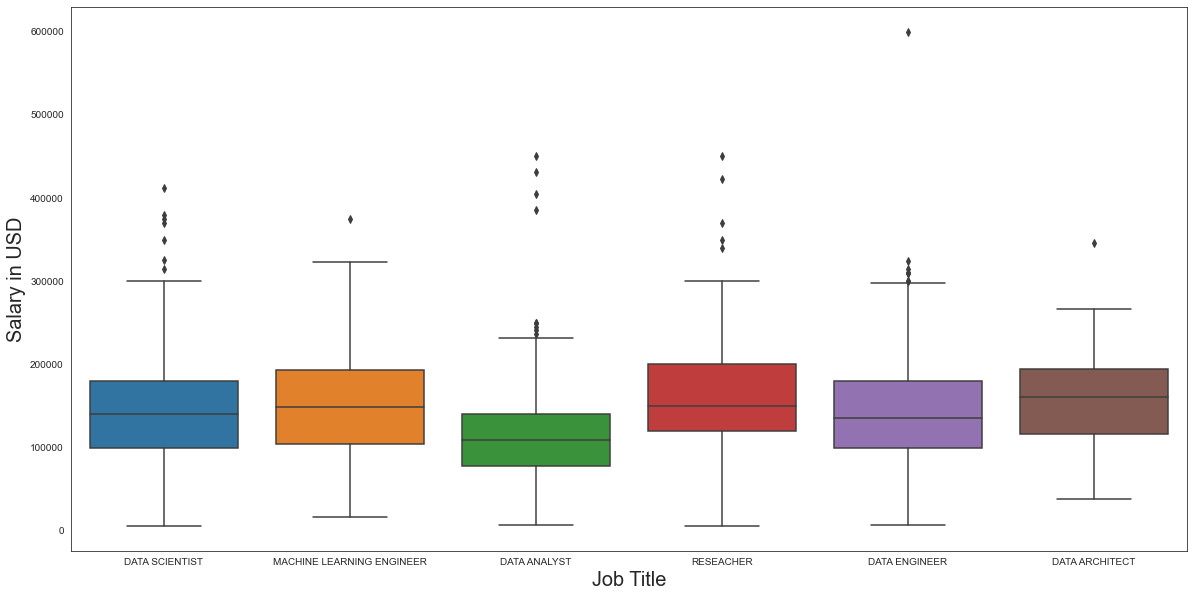

In [24]:

fig = plt.figure(figsize=(20,10))
sns.boxplot(x='job_title', y='salary_in_usd', data=salaries_world_around_df_preprocessed)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel("Salary in USD", fontsize=20)

vamos olhar mais detalhamdamente a distribuição de salarios por categorias

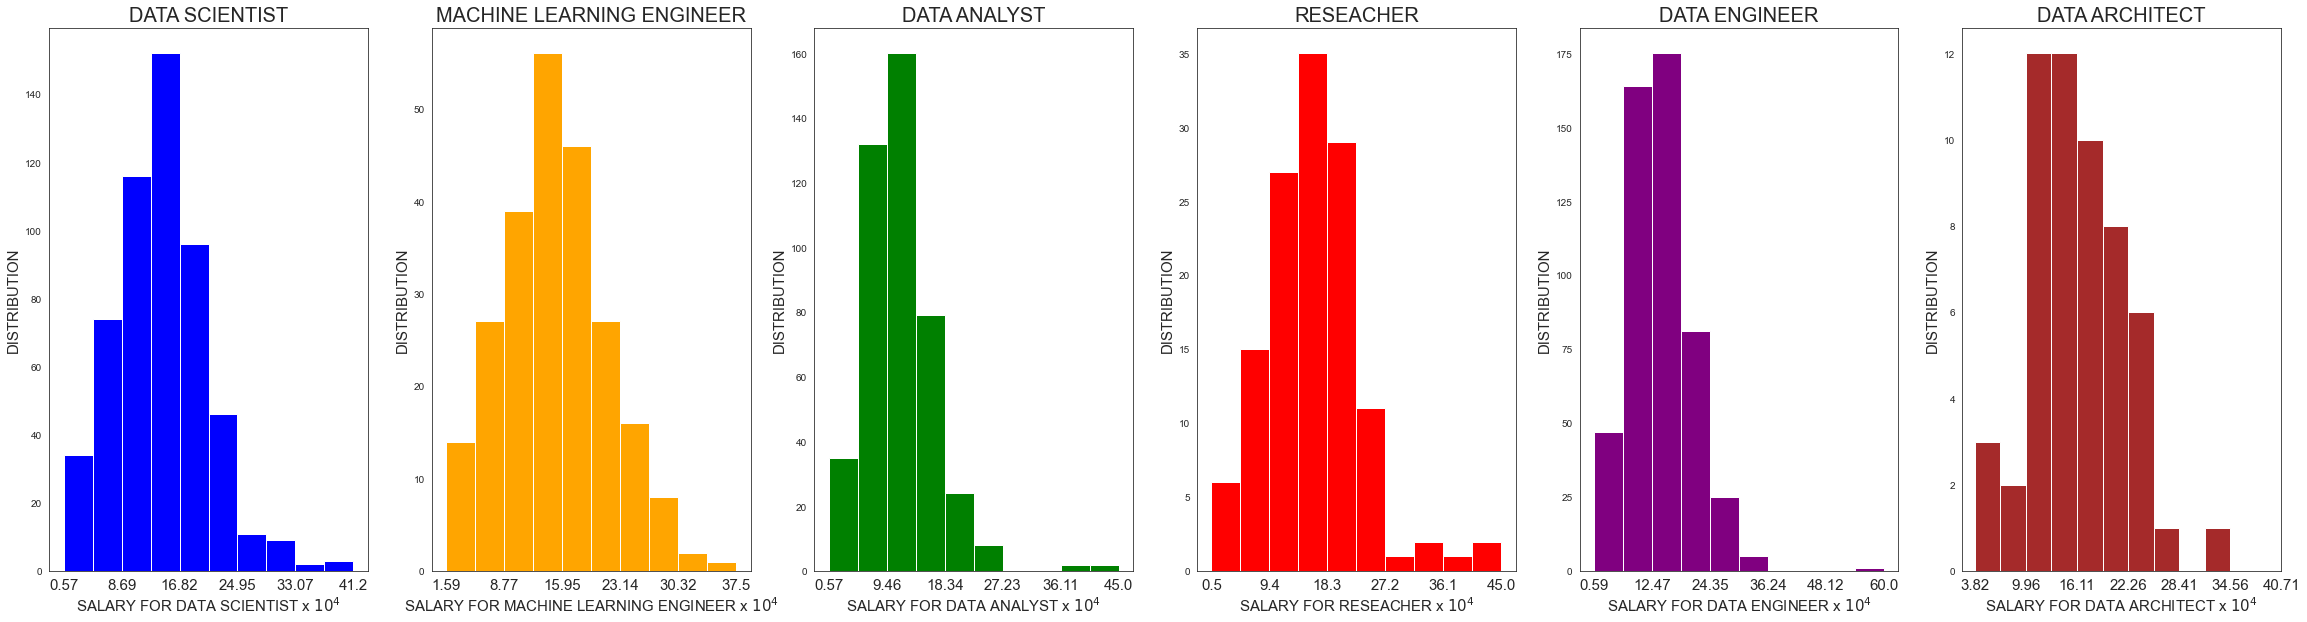

In [25]:
import numpy as np
from Env.Constants import JOB_COLORS

jobs = salaries_world_around_df_preprocessed['job_title'].unique()
fig,axs = plt.subplots(1, len(jobs), figsize=(40,10))
for job, i in zip(jobs, range(0, len(jobs))):
    
    #set ticks
    n_ticks= 5
    power=4
    scaling= 10**power
    
    job_roles_salaries = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd'] / scaling
    min_sal = (job_roles_salaries.min()) 
    max_sal = job_roles_salaries.max()
    
    job_roles_salaries.plot(kind='hist', ax=axs[i], color=JOB_COLORS[i])
   
    step = (max_sal - min_sal )/ n_ticks
    range_sal =  [round(el,2) for el in np.arange(min_sal , max_sal + step, step) ] 

    
    #set ticks
    axs[i].set_xticks(range_sal)
    axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=15)
    axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
    axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
    axs[i].set_title(f"{job}", fontsize=20)
    
    
    

    
    

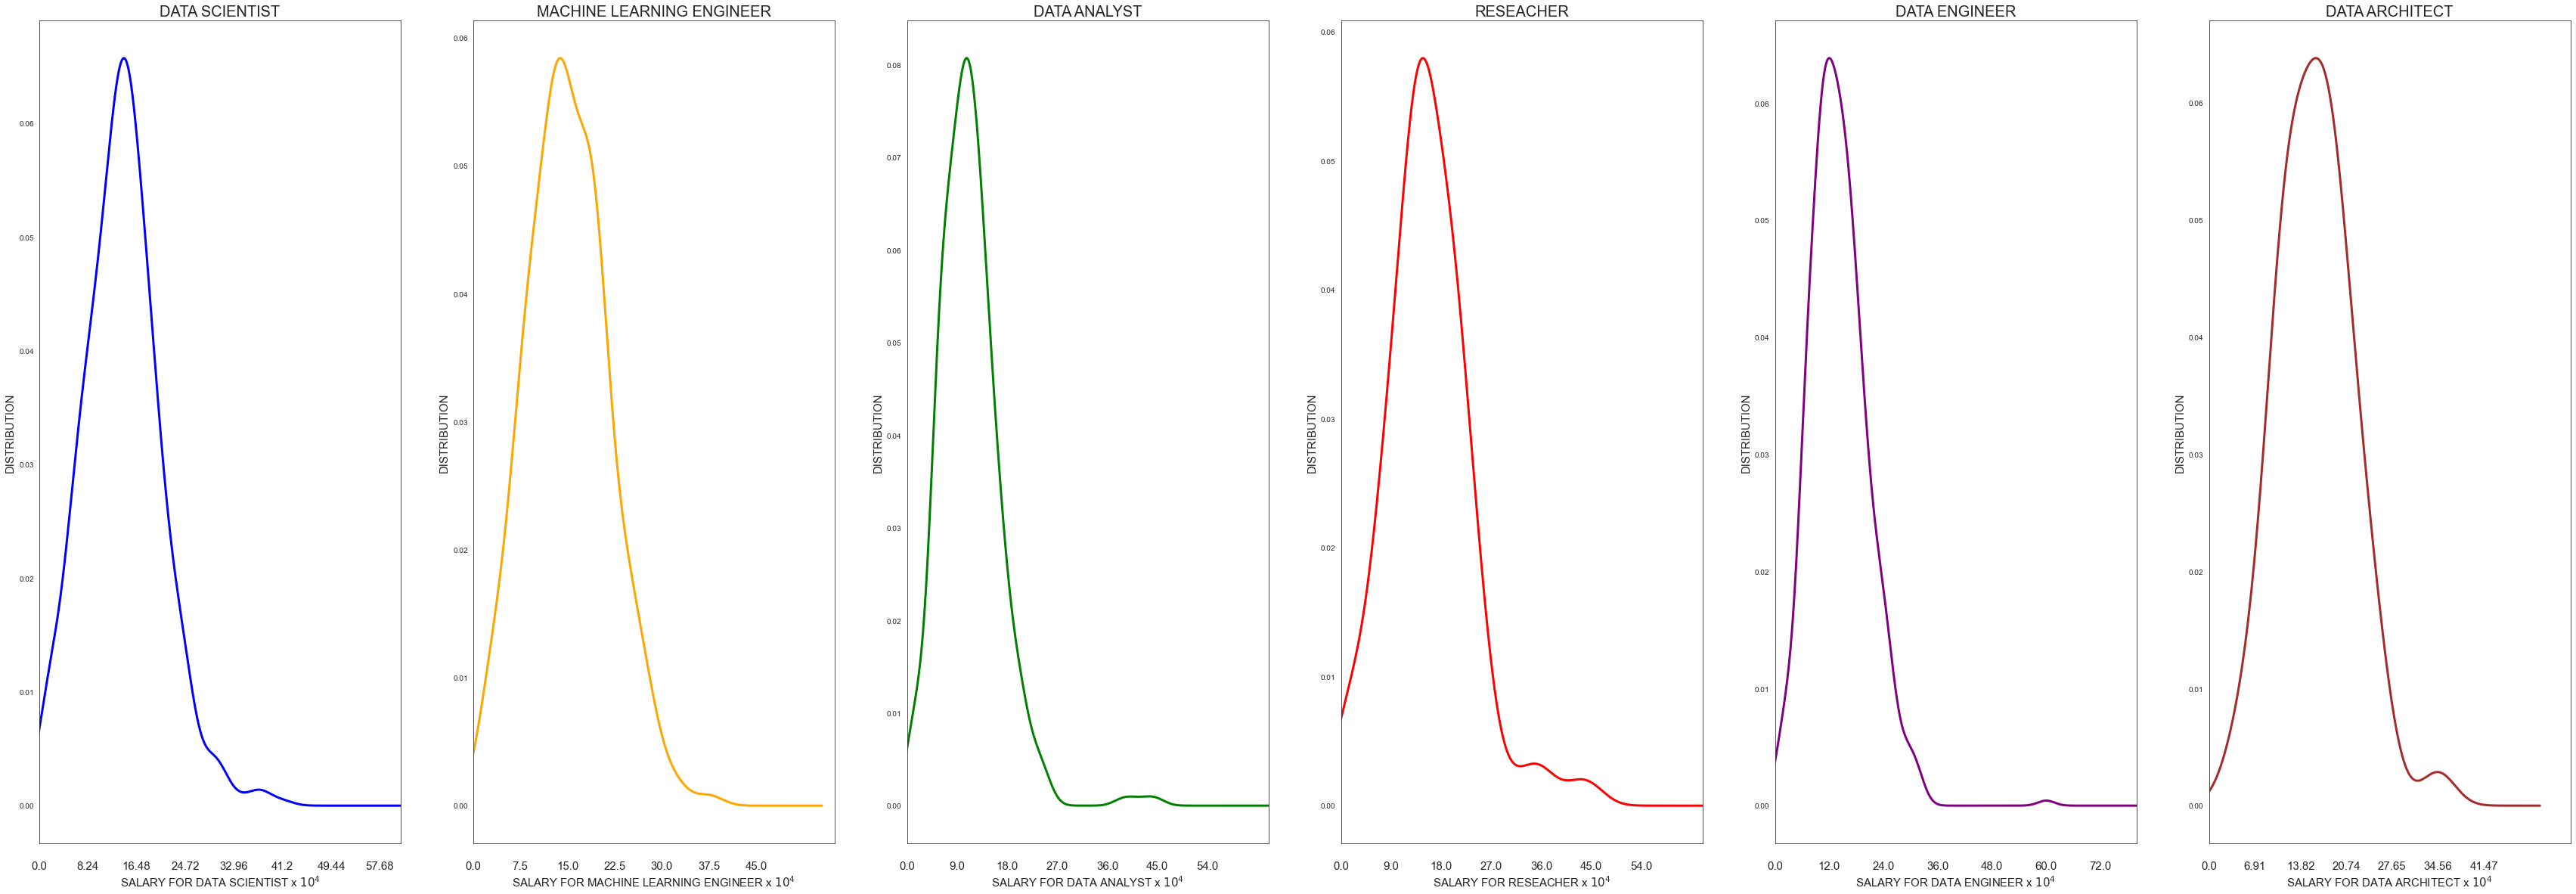

In [26]:


jobs = salaries_world_around_df_preprocessed['job_title'].unique()
fig,axs = plt.subplots(1, len(jobs), figsize=(60,20))

for job, i in zip(jobs, range(0, len(jobs))):
    
    #set ticks
    labels = 6
    n_ticks =  labels - 1
    power=4
    scaling= 10**power
    
    job_roles_salaries = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd'] / scaling
    min_sal = 0
    max_sal = job_roles_salaries.max()
    
    job_roles_salaries.plot(kind='density', ax=axs[i], color=JOB_COLORS[i], linewidth = 3)
   
    step = (max_sal - min_sal )/ n_ticks
    range_sal =  [round(el,2) for el in np.arange(min_sal  , max_sal + 2*step, step) ] 

    
    #set ticks
    offset= 20
    axs[i].set_xticks(range_sal)
    axs[i].tick_params(axis='x', which='major', pad=20)
    axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=15)
    axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
    axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
    axs[i].set_title(f"{job}", fontsize=20)
    axs[i].set_xlim([0, max_sal + offset])


Pelo que se pode observar nenhum deles visualmente demonstra uma distribuição normal, vamo então verificar isso numéricamente, para isso vamos usar o teste de Kolmogorov–Smirnov

In [27]:
from scipy.stats import kstest



for job in salaries_world_around_df_preprocessed['job_title'].unique():
    stat, p = kstest( salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd'], 'norm')
    alpha = 0.05
    
    if p > alpha:
        print(f"Os salarios para {job} SEGUEM uma distruição normal")
    else:
        print(f"Os salarios para {job} NÃO SEGUEM uma distruição normal")
    

Os salarios para DATA SCIENTIST NÃO SEGUEM uma distruição normal
Os salarios para MACHINE LEARNING ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ANALYST NÃO SEGUEM uma distruição normal
Os salarios para RESEACHER NÃO SEGUEM uma distruição normal
Os salarios para DATA ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ARCHITECT NÃO SEGUEM uma distruição normal


Segundo esse teste nenhuma dos salários seguem uma distribuição normal, sendo assim utilizaremos o IRQ como filtro de outliers

vamos tentar filtrar a variavel "salary_in_usd" de forma global, ou seja sem categorizações:

In [28]:
salaries_world_around_df_preprocessed['salary_in_usd']

0        64369.0
4       125000.0
5       120000.0
6       450000.0
9       127543.0
          ...   
962      67240.0
1047     75455.0
1048     63285.0
1051     58417.0
1052     46246.0
Name: salary_in_usd, Length: 1903, dtype: float64

Performing Data Filtering... 
Data Filtering DONE ! 



Text(0, 0.5, 'Salary in USD')

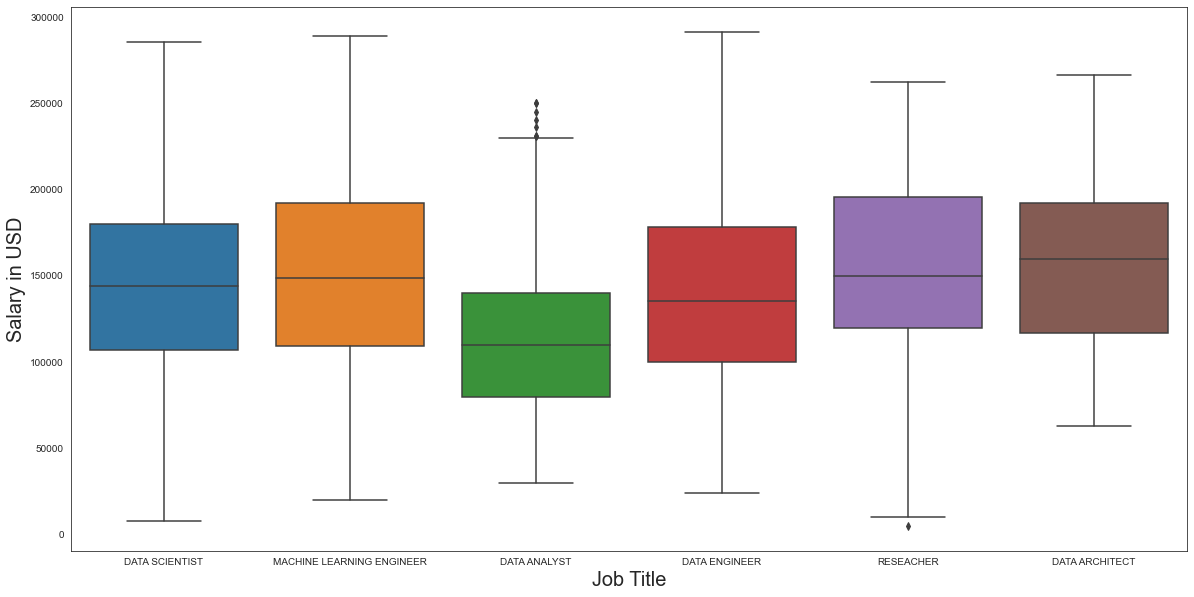

In [29]:
from Preprocessing.CleanData.DataFilter import  DataFilter
test_df = DataFilter(filter_by = "FILTER_OUTLIERS_BY_IQR",col ='salary_in_usd').process_data(salaries_world_around_df_preprocessed)


fig = plt.figure(figsize=(20,10))
sns.boxplot(x='job_title', y='salary_in_usd', data = test_df)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel("Salary in USD", fontsize=20)


Performou bem para boa parte das categorias, porém 2 categorias em específico ficaram com mais outliers, talvez sejam mais interessante filtrar por categoria

Performing Data Filtering... 
Data Filtering DONE ! 



Text(0, 0.5, 'Salary in USD')

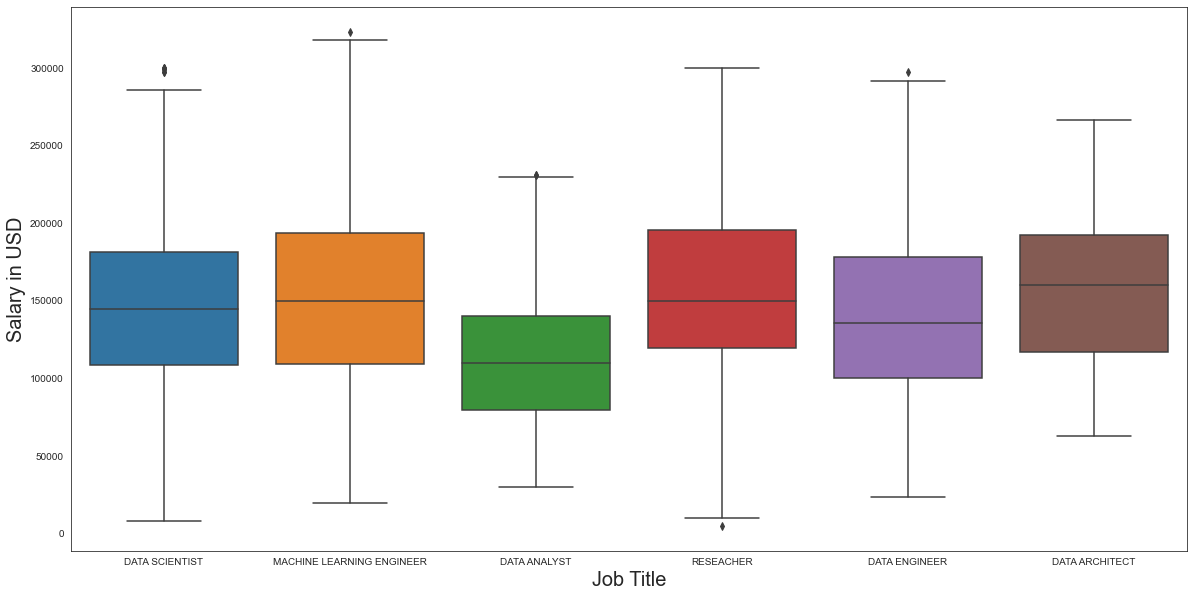

In [30]:


test_df = DataFilter( filter_by="FILTER_OUTLIERS_CATEGORICALLY_BY_IRQ", col='salary_in_usd', category_col='job_title').process_data(salaries_world_around_df_preprocessed)

fig = plt.figure(figsize=(20,10))
sns.boxplot(x='job_title', y='salary_in_usd', data = test_df)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel("Salary in USD", fontsize=20)

Dessa forma o desempenho foi melhor, sendo assim vamos ficar com a filtragem de outlier por categoria

In [31]:
salaries_world_around_df_preprocessed = test_df

In [32]:
salaries_world_around_df_preprocessed

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,ENTRY-LEVEL,FT,DATA SCIENTIST,54000,EUR,64369.0,GERMANY,50,GERMANY,LARGE-SIZE
9,2021,SENIOR-LEVEL,FT,DATA SCIENTIST,159500,CAD,127543.0,CANADA,50,CANADA,LARGE-SIZE
10,2021,SENIOR-LEVEL,FT,DATA SCIENTIST,144000,USD,144000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,LARGE-SIZE
12,2021,MID-LEVEL,FT,DATA SCIENTIST,95000,CAD,75966.0,CANADA,100,CANADA,LARGE-SIZE
13,2021,MID-LEVEL,FT,DATA SCIENTIST,150000,USD,150000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
...,...,...,...,...,...,...,...,...,...,...,...
389,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,120000,USD,120000.0,UNITED STATES OF AMERICA,0,UNITED STATES OF AMERICA,MEDIUM-SIZE
446,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,198000,USD,198000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
447,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,114000,USD,114000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE
469,2023,SENIOR-LEVEL,FT,DATA ARCHITECT,160000,USD,160000.0,UNITED STATES OF AMERICA,100,UNITED STATES OF AMERICA,MEDIUM-SIZE


A etapa de verificação para  "Salaries Around World" foi concluida, agora vamos a verificação do dataset extraido do H1BData

### H1BData

Vamos então a verificação preliminar

In [33]:
h1bdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82431 entries, 0 to 82430
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82431 non-null  int64 
 1   company     82430 non-null  object
 2   title       82396 non-null  object
 3   salary      82396 non-null  object
 4   location    82396 non-null  object
 5   date        82396 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.8+ MB


In [34]:
h1bdata_df.head(30)

,Unnamed: 0,company,title,salary,location,date
0,0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,"45,980","ORLANDO, FL",04/09/2020
1,1,PERCOLATA CORPORATION,DATA SCIENTIST,"46,060","PALO ALTO, CA",03/18/2016
2,2,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015
3,3,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015
4,4,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,"50,000","JOHNS CREEK, GA",03/16/2017
5,5,YONO HEALTH INC,DATA SCIENTIST,"50,220","SUNNYVALE, CA",02/28/2017
6,6,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/08/2021
7,7,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/12/2021
8,8,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/16/2021
9,9,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860","CHICAGO, IL",02/28/2019


Como pudemos ver algumas linhas tem valores nullos, vamos olhar um pouco mais a fundo para ver como essas linhas estão

In [35]:
h1bdata_df[h1bdata_df.isna().any( axis = 1)]




,Unnamed: 0,company,title,salary,location,date
10,10,\n \n,NaN,NaN,NaN,NaN
40,40,\n\n\n\n\n,NaN,NaN,NaN,NaN
81,81,\n\n\n\n\n,NaN,NaN,NaN,NaN
122,122,\n\n\n\n\n,NaN,NaN,NaN,NaN
163,163,\n\n\n\n\n,NaN,NaN,NaN,NaN
16968,16968,\n \n,NaN,NaN,NaN,NaN
16998,16998,\n\n\n\n\n,NaN,NaN,NaN,NaN
17039,17039,\n\n\n\n\n,NaN,NaN,NaN,NaN
17080,17080,\n\n\n\n\n,NaN,NaN,NaN,NaN
17121,17121,\n\n\n\n\n,NaN,NaN,NaN,NaN


Como visto acima, basta então eliminar todas as linhas que valor NaN em algumas das variáveis do dataset, assim eliminamos todas as linhas em branco.

In [36]:
from Preprocessing.CleanData.MissingDataHandler import MissingDataHandler


h1_bdata_blank_lines_cleaner = MissingDataHandler(handling_by = "CLEAN_BLANK_LINES")
h1bdata_df_preprocessed = h1_bdata_blank_lines_cleaner.process_data(h1bdata_df)
h1bdata_df_preprocessed.info()

Performing missing values elimination... 
missing values elimination DONE !

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82395 entries, 0 to 82430
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82395 non-null  int64 
 1   company     82395 non-null  object
 2   title       82395 non-null  object
 3   salary      82395 non-null  object
 4   location    82395 non-null  object
 5   date        82395 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.4+ MB


In [37]:
sum(h1bdata_df_preprocessed.isna().any())

0

Todas as linhas em branco foram eliminadas ! Por seguinte passemos a análise de distribuição da variável correspondete aos salários por  título de trabalho, mas antes precisamos converter essa coluna para o tipo float

In [38]:
h1bdata_df_preprocessed['salary']

0         45,980
1         46,060
2         47,960
3         47,960
4         50,000
          ...   
82426    183,000
82427    200,476
82428    200,476
82429    216,000
82430    225,000
Name: salary, Length: 82395, dtype: object

precisamos nos livrar dessa vírgula e  converter essa coluna para float

In [39]:
h1_bdata_comma_replacer = DataReplacer(task = "CHARREPLACING", on_col = "salary", this = ",", by = "")
h1_bdata_convert_salaries_to_float = DataTypeConversor(to_type='TO_FLOAT', col='salary')
h1bdata_df_preprocessed = PreProcessing( pre_processors=[h1_bdata_comma_replacer,  h1_bdata_convert_salaries_to_float]).process_data(h1bdata_df_preprocessed)
h1bdata_df_preprocessed['salary']

Performing Data Replacement... 
Data Replacement DONE !

Perform Data conversion... 
Data conversion DONE !



0         45980.0
1         46060.0
2         47960.0
3         47960.0
4         50000.0
           ...   
82426    183000.0
82427    200476.0
82428    200476.0
82429    216000.0
82430    225000.0
Name: salary, Length: 82395, dtype: float64

perfeito, agora podemos fazer uma análise de distribuição dessa variável.

(0.0, 250000.0)

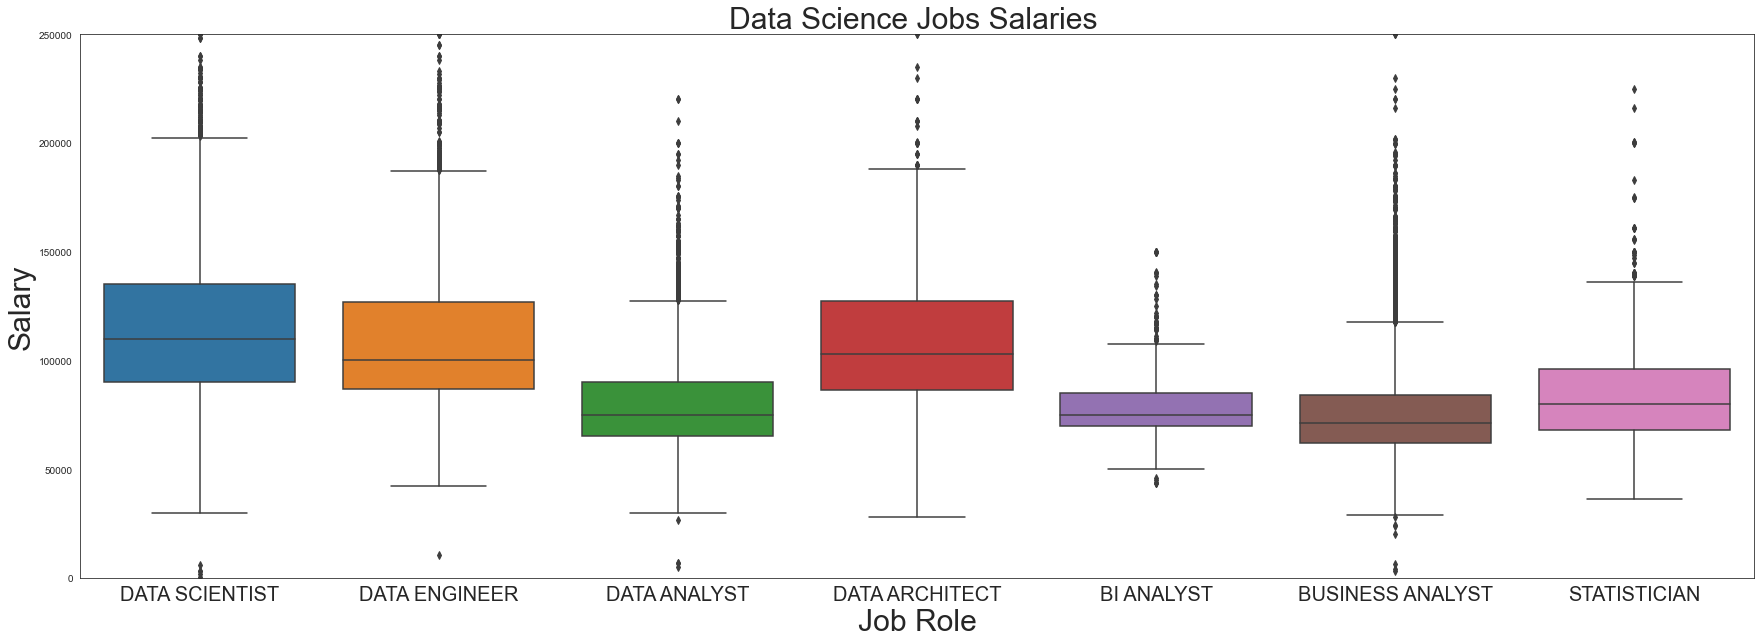

In [40]:
plt.figure(figsize=(30,10))
sns.boxplot(data=h1bdata_df_preprocessed, y="salary",x='title')
sns.set_style('white')
plt.title("Data Science Jobs Salaries ", fontsize=30)
plt.ylabel("Salary", fontsize=30)
plt.xlabel("Job Role", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks()
plt.ylim([0,2.5e5])

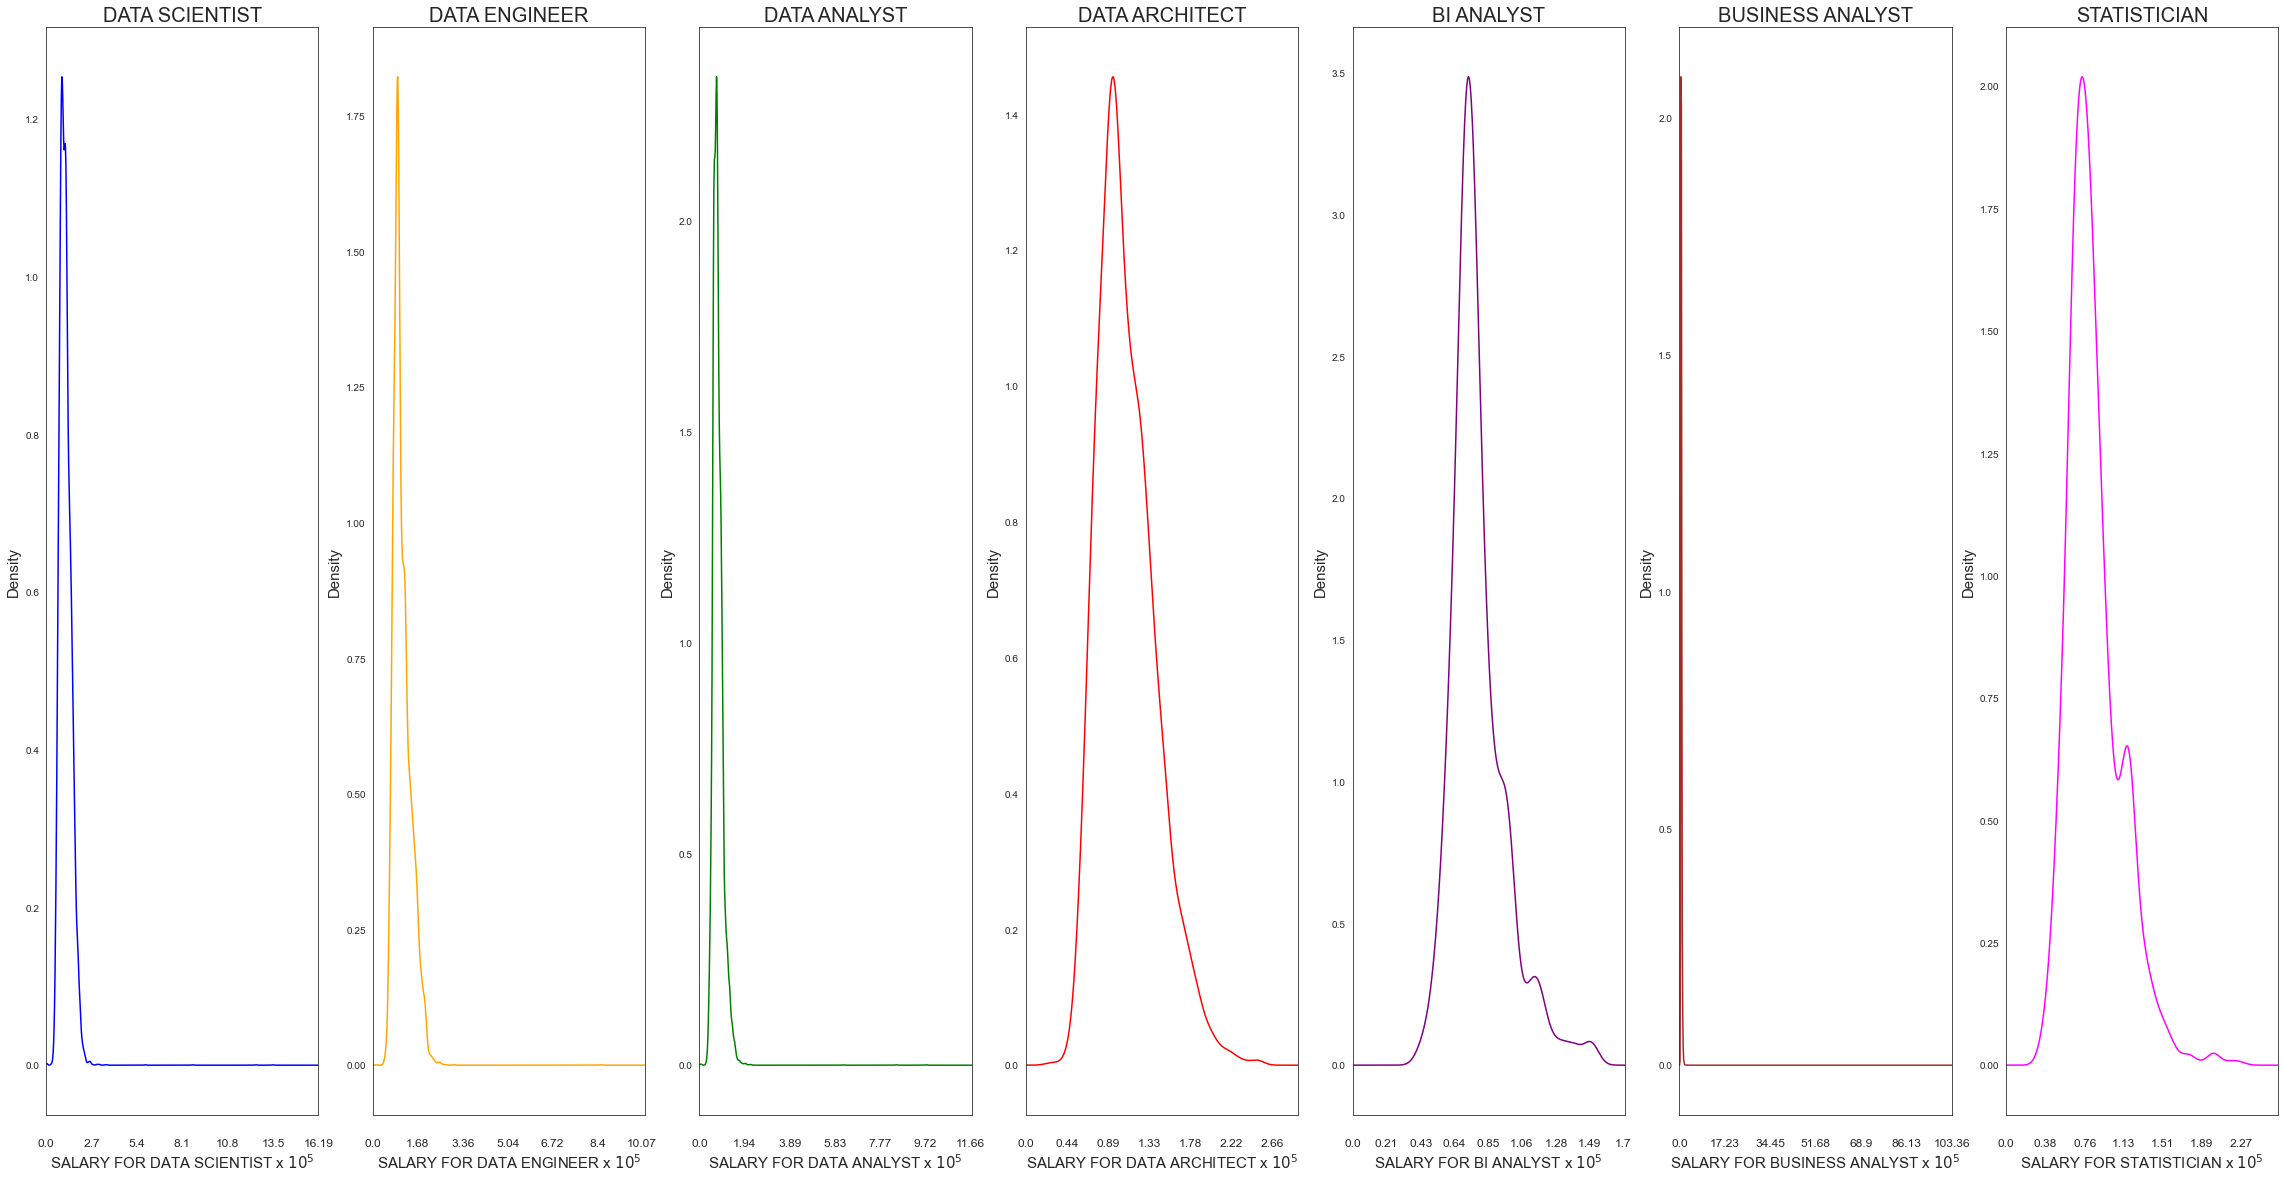

In [41]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(40,20))
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  

  
  n_ticks= 5
  power=5
  scaling= 10**power
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']/ scaling
  
  
  
  
 
  
  max_sal=  salaries.max()
  min_sal = salaries.min()
  step = (max_sal - min_sal )/ n_ticks
  range_sal =  [round(el,2) for el in np.arange(0 , max_sal + step, step) ] 
  
  #set title
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
  
  
  #set ticks
  

  axs[i].set_xlim([0, max_sal])
  axs[i].set_xticks(range_sal)
  axs[i].tick_params(axis='x', which='major', pad=20)
  axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=12)
  axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
  axs[i].set_title(f"{job}", fontsize=20)
  axs[i].set_xlim([0, max_sal + step])
  
  
  #plot
  
  salaries.plot(kind='density', ax= axs[i],color=JOB_COLORS[i])

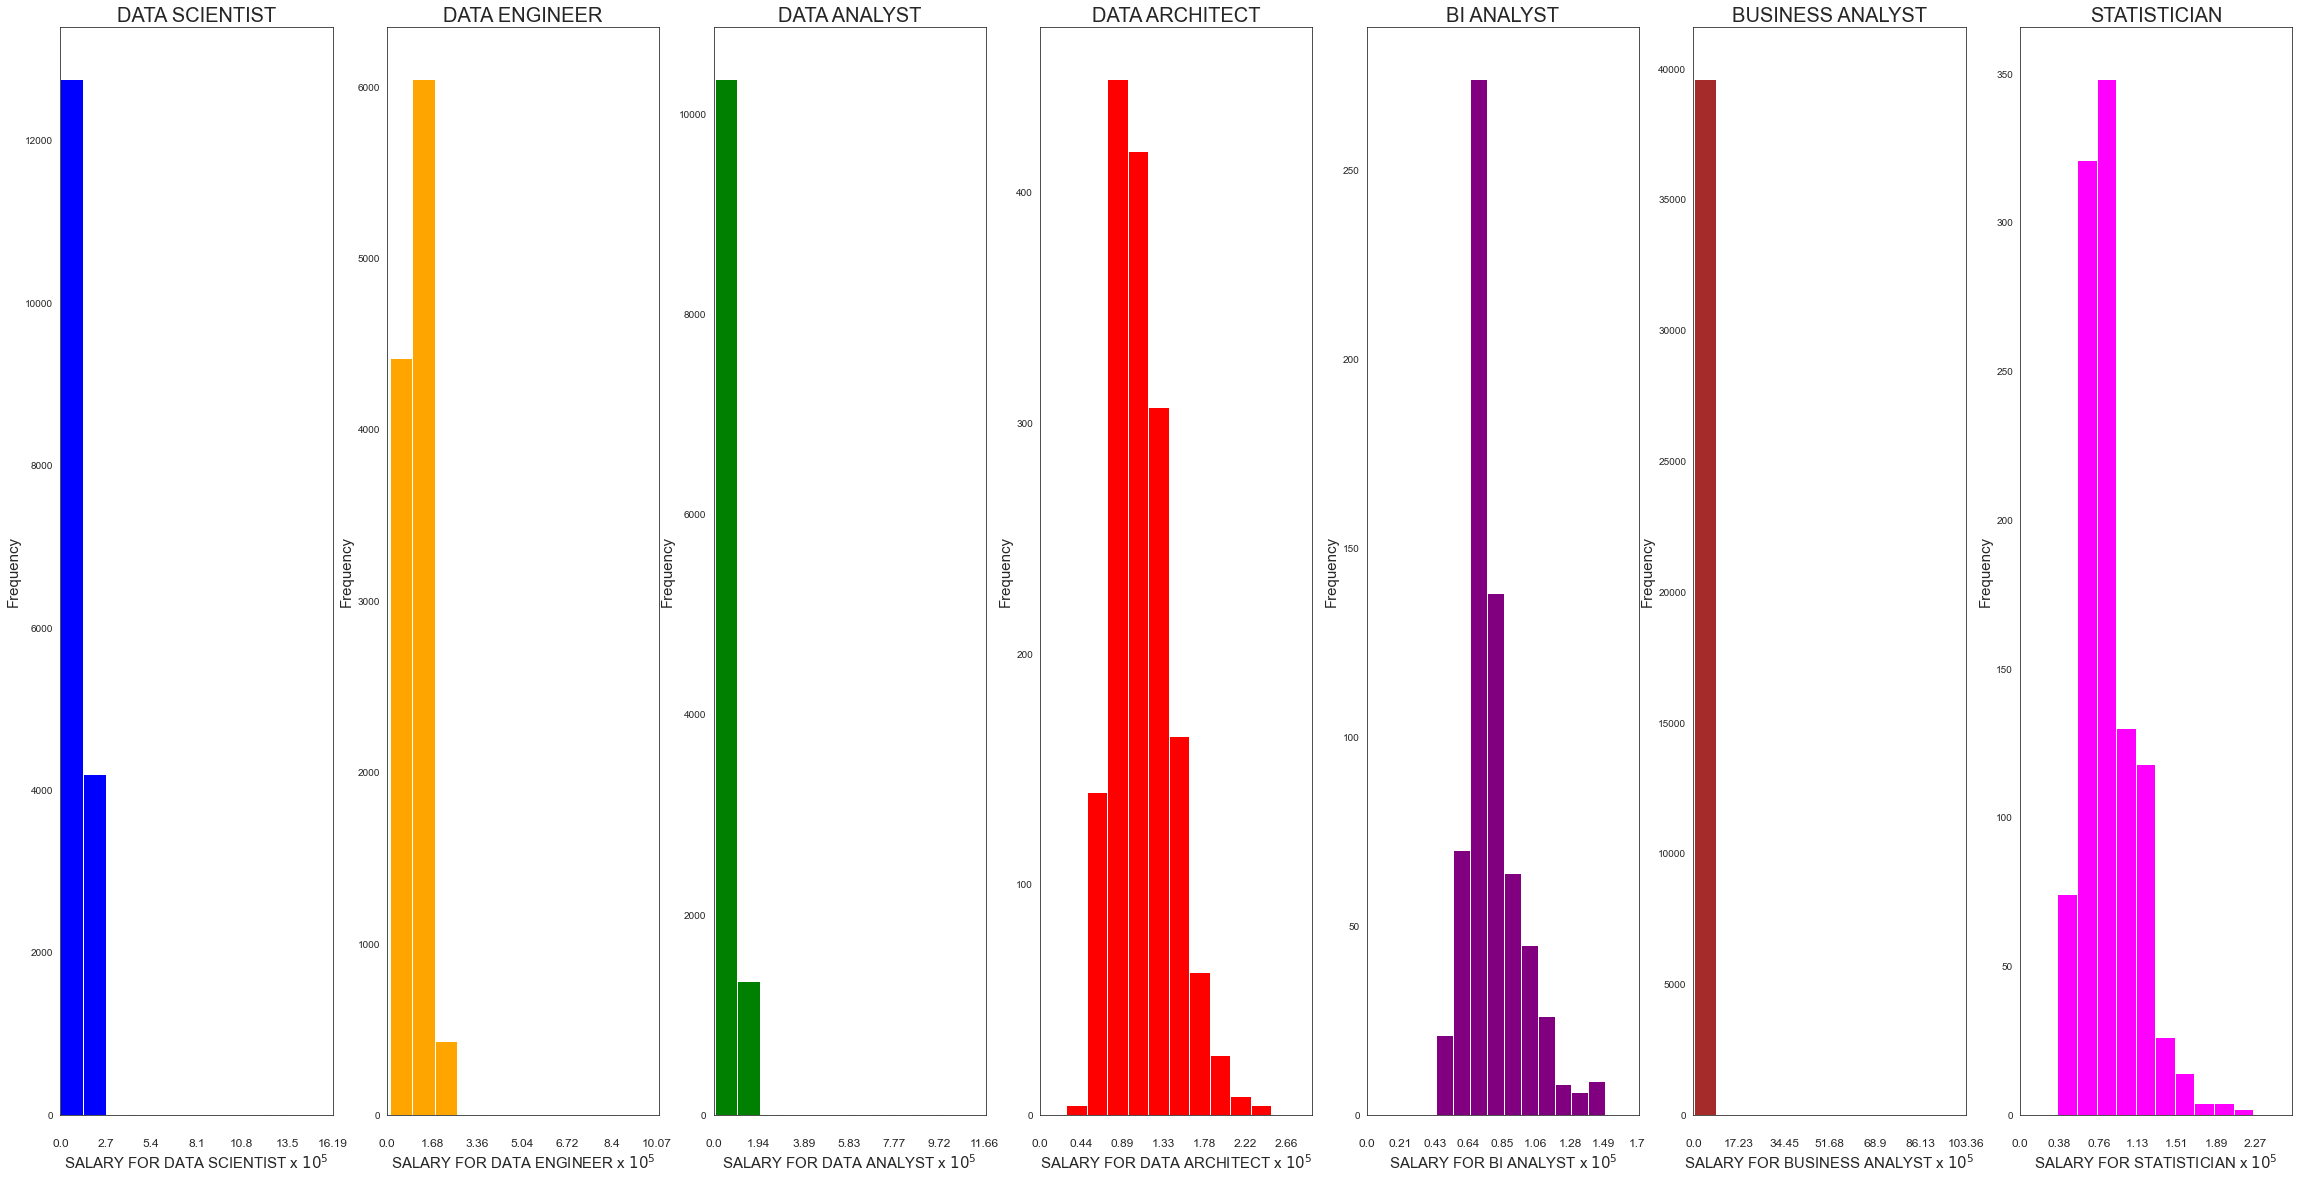

In [42]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(40,20))
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  

  
  n_ticks= 5
  power=5
  scaling= 10**power
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']/ scaling
  
  
  
  
 
  
  max_sal=  salaries.max()
  min_sal = salaries.min()
  step = (max_sal - min_sal )/ n_ticks
  range_sal =  [round(el,2) for el in np.arange(0 , max_sal + step, step) ] 
  
  #set title
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
  
  
  #set ticks
  

  axs[i].set_xlim([0, max_sal])
  axs[i].set_xticks(range_sal)
  axs[i].tick_params(axis='x', which='major', pad=20)
  axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=12)
  axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
  axs[i].set_title(f"{job}", fontsize=20)
  axs[i].set_xlim([0, max_sal + step])
  
  
  #plot
  
  salaries.plot(kind='hist', ax= axs[i],color=JOB_COLORS[i])

Como podemos ver há muitos outliers, e eles estão distorcendo fortemente os dados, da a sua discrepância em relação aos valores representativos. Necessitamos elimina-los, como da última vez vamos checar se de fato todas as variáveis não são normais como visualmente aparentam.

In [43]:
for job in h1bdata_df_preprocessed['title'].unique():
    stat, p = kstest( h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title'] == job]['salary'], 'norm')
    alpha = 0.05
    
    if p > alpha:
        print(f"Os salarios para {job} SEGUEM uma distruição normal")
    else:
        print(f"Os salarios para {job} NÃO SEGUEM uma distruição normal")

Os salarios para DATA SCIENTIST NÃO SEGUEM uma distruição normal
Os salarios para DATA ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ANALYST NÃO SEGUEM uma distruição normal
Os salarios para DATA ARCHITECT NÃO SEGUEM uma distruição normal
Os salarios para BI ANALYST NÃO SEGUEM uma distruição normal
Os salarios para BUSINESS ANALYST NÃO SEGUEM uma distruição normal
Os salarios para STATISTICIAN NÃO SEGUEM uma distruição normal


ok, então vamos filtrar os outliers pelo IRQ como fizemos no último deataset e das mesma forma, já que filtragem pela categorias que nos interessam são mais eficiente como pudemos ver.
Após a filtragem vamos checar como tudo ficou

In [44]:
h1bdata_df_preprocessed = DataFilter(filter_by="FILTER_OUTLIERS_CATEGORICALLY_BY_IRQ", col='salary', category_col='title').process_data(h1bdata_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



(0.0, 250000.0)

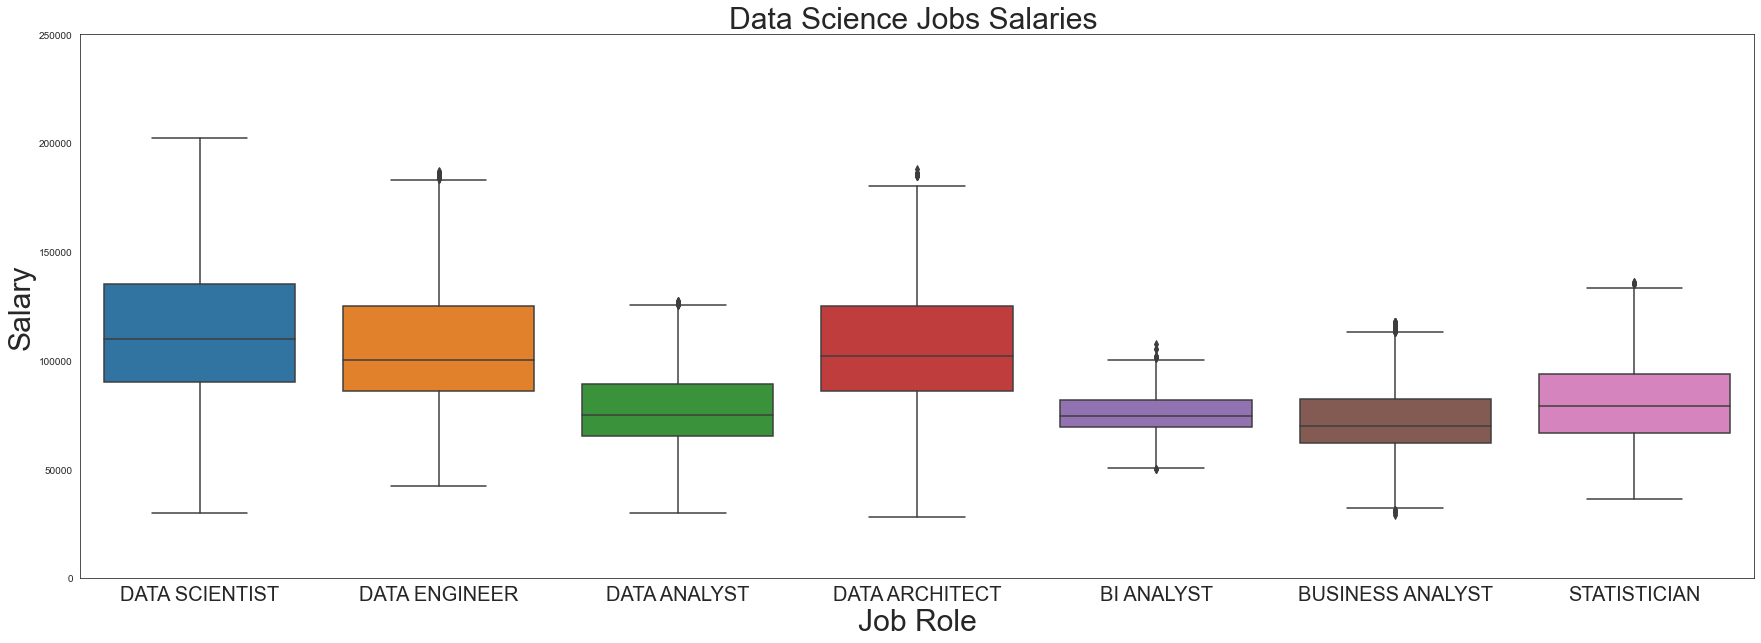

In [45]:
plt.figure(figsize=(30,10))
sns.boxplot(data=h1bdata_df_preprocessed, y="salary",x='title')
sns.set_style('white')
plt.title("Data Science Jobs Salaries ", fontsize=30)
plt.ylabel("Salary", fontsize=30)
plt.xlabel("Job Role", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks()
plt.ylim([0,2.5e5])

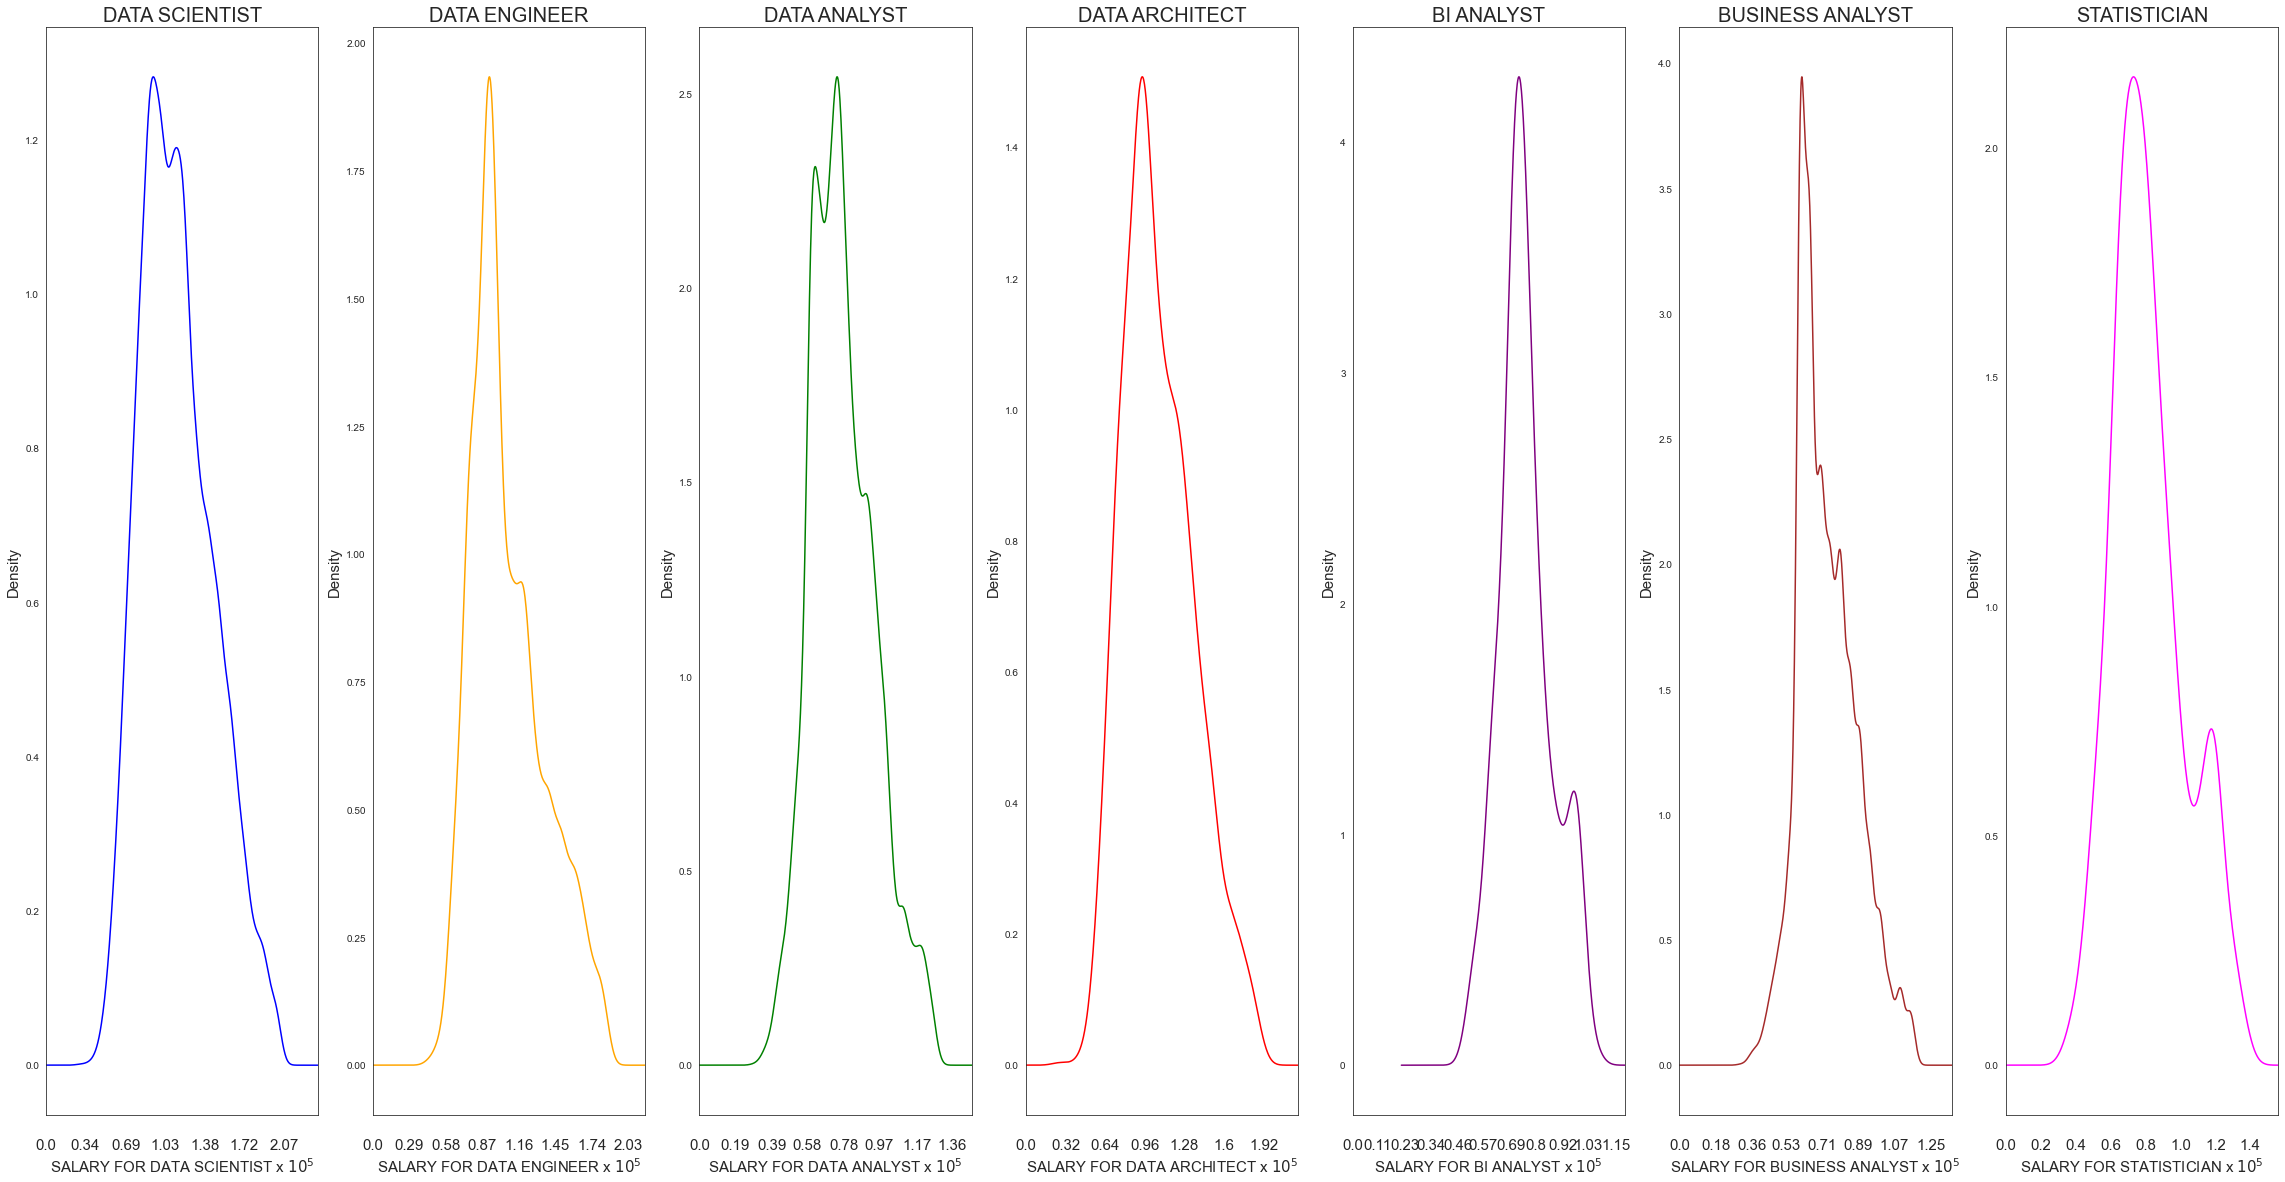

In [46]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(40,20))
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  

  
  n_ticks= 5
  power=5
  scaling= 10**power
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']/ scaling
  
  
  
  
 
  
  max_sal=  salaries.max()
  min_sal = salaries.min()
  step = (max_sal - min_sal )/ n_ticks
  range_sal =  [round(el,2) for el in np.arange(0 , max_sal + step, step) ] 
  
  #set title
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
  
  
  #set ticks
  

  axs[i].set_xlim([0, max_sal])
  axs[i].set_xticks(range_sal)
  axs[i].tick_params(axis='x', which='major', pad=20)
  axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=15)
  axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=15)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 15)
  axs[i].set_title(f"{job}", fontsize=20)
  axs[i].set_xlim([0, max_sal + step])
  
  
  #plot
  
  salaries.plot(kind='density', ax= axs[i],color=JOB_COLORS[i])

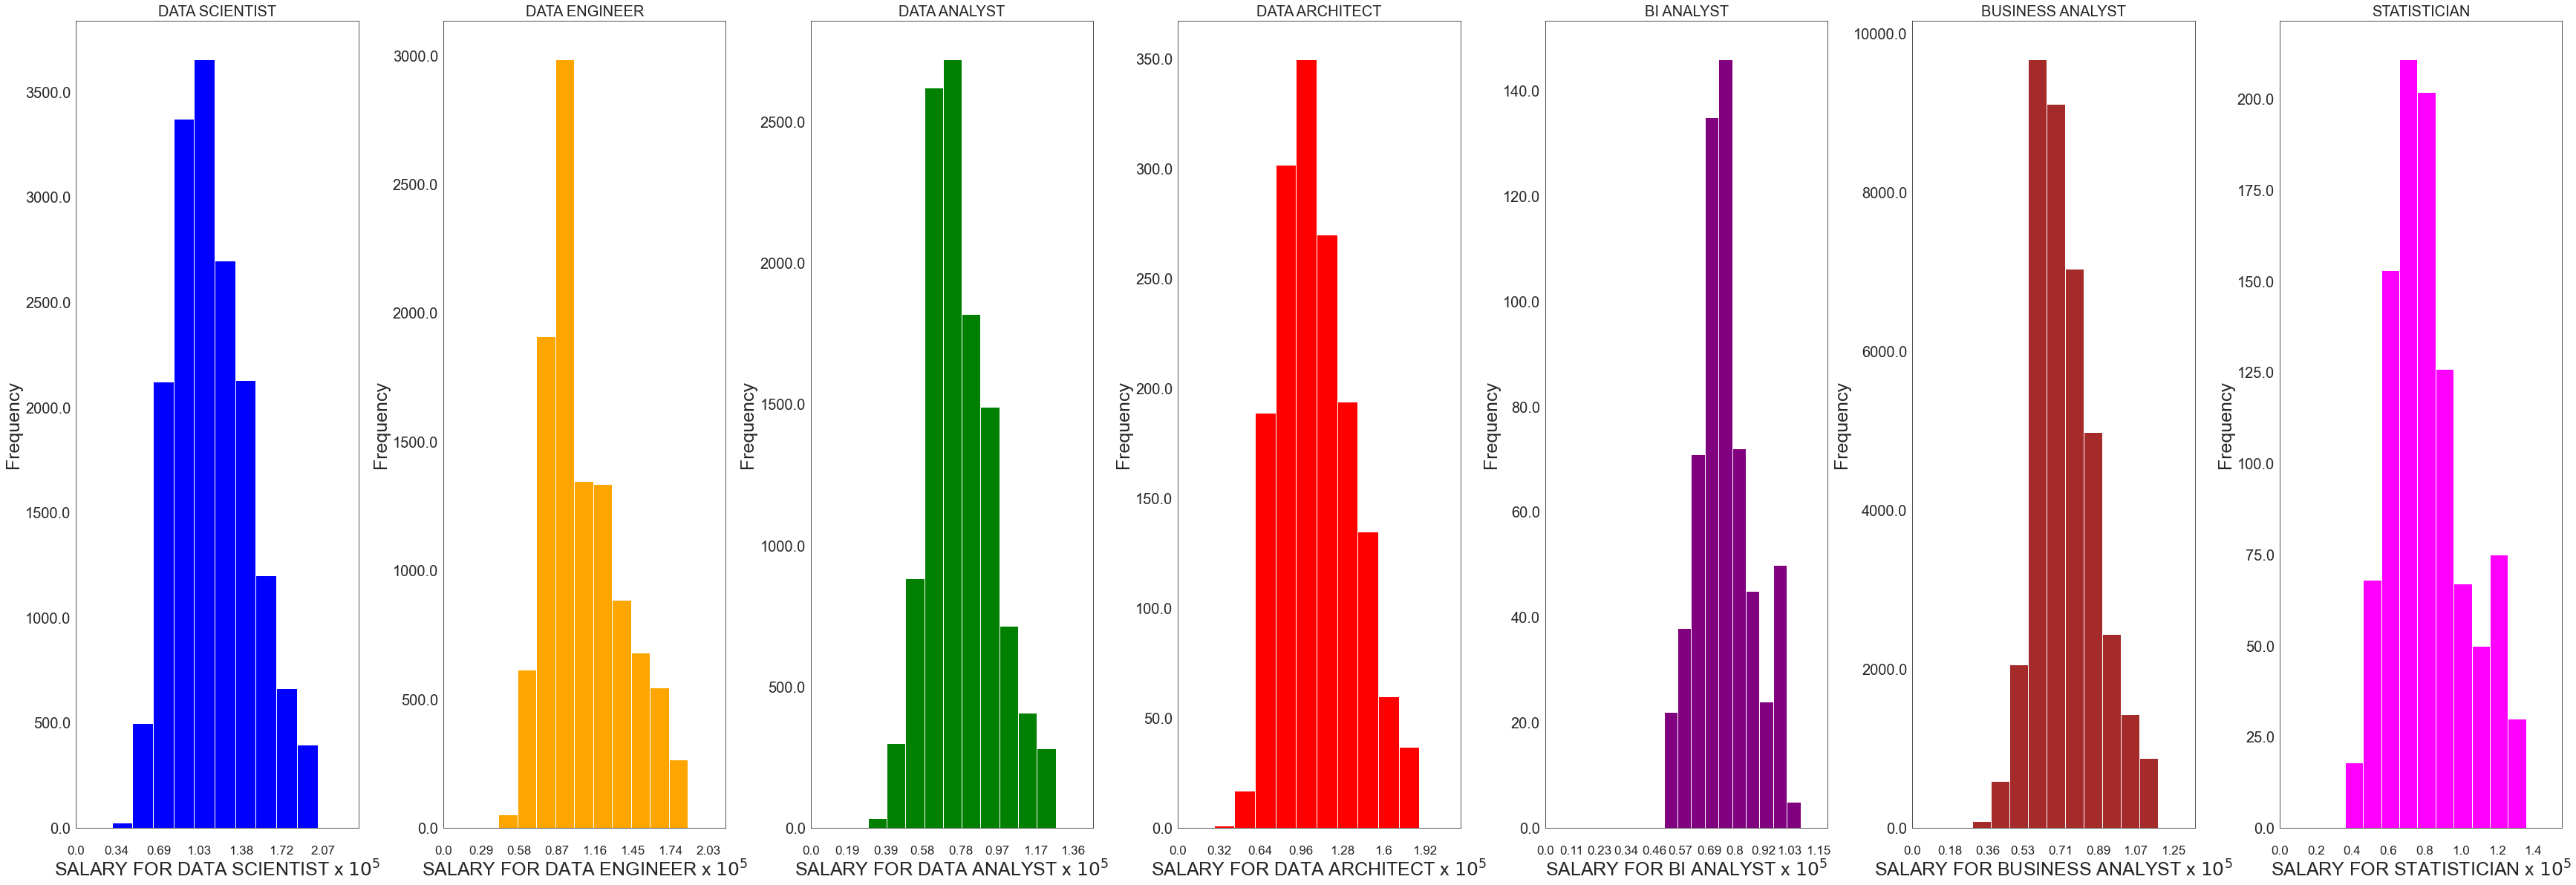

In [47]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(60,20))
fig.set_facecolor('white')
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  

  
  n_ticks= 5
  power=5
  scaling= 10**power
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']/ scaling
  
  
  
  
 
  
  max_sal=  salaries.max()
  min_sal = salaries.min()
  step = (max_sal - min_sal )/ n_ticks
  range_sal =  [round(el,2) for el in np.arange(0 , max_sal + step, step) ] 
  
  #set title
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
  
  
  #set ticks
  

  axs[i].set_xlim([0, max_sal])
  axs[i].set_xticks(range_sal)
  axs[i].tick_params(axis='x', which='major', pad=20)
  axs[i].set_xticklabels( [str(i) for i in range_sal], fontsize=17)
  
  axs[i].set_xlabel(f"SALARY FOR {job} x $10^{power}$", fontsize=25)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 25)
  axs[i].set_title(f"{job}", fontsize=20)
  axs[i].set_xlim([0, max_sal + step])
  
  
  ax = salaries.plot(kind='hist', ax= axs[i],color=JOB_COLORS[i])
  ax.set_yticklabels([ str(el) for el in ax.get_yticks() ] , fontsize=20)
  #plot
  
  

Outra coisa observada na avaliação preliminar foi que   a coluna de data não esta no formato de data e sim object, por isso precisamos converte-la e ajusta-la para formato brasileiro, já que a data está em formato americano.

In [48]:
h1bdata_df_preprocessed['date']

0        04/09/2020
1        03/18/2016
2        02/18/2015
3        02/18/2015
4        03/16/2017
            ...    
82389    08/27/2022
82390    08/26/2022
82391    10/26/2015
82392    03/13/2019
82393    06/09/2018
Name: date, Length: 80150, dtype: object

In [49]:
h1_bdata_covert_date_to_datetime = DataTypeConversor(to_type='TO_DATETIME', col = 'date',actual_date_format="%m/%d/%Y", to_date_format = "%d/%m/%Y")
h1bdata_df_preprocessed = h1_bdata_covert_date_to_datetime.process_data(h1bdata_df_preprocessed)

Perform Data conversion... 
Data conversion DONE !



In [50]:
h1bdata_df_preprocessed['date']

0        09/04/2020
1        18/03/2016
2        18/02/2015
3        18/02/2015
4        16/03/2017
            ...    
82389    27/08/2022
82390    26/08/2022
82391    26/10/2015
82392    13/03/2019
82393    09/06/2018
Name: date, Length: 80150, dtype: object

outro ajuste a ser feito é um split na coluna location. Não faz sentido para nossa análise ter uma coluna  com estado,cidade.

In [51]:
h1bdata_df_preprocessed['location']

0            ORLANDO, FL
1          PALO ALTO, CA
2           FORT LEE, NJ
3           FORT LEE, NJ
4        JOHNS CREEK, GA
              ...       
82389       SOMERSET, NJ
82390       SOMERSET, NJ
82391      CHARLOTTE, NC
82392       BENSALEM, PA
82393       SOMERSET, NJ
Name: location, Length: 80150, dtype: object

In [52]:
from Preprocessing.TransformData.DataSplitter import DataSplitter


h1_bdata_splitt_location_column = DataSplitter(delimiter = ',' , old_col = 'location', new_col1='city', new_col2='state')
h1bdata_df_preprocessed = h1_bdata_splitt_location_column.process_data(h1bdata_df_preprocessed)

Performing Data splitting...
Data splitting DONE !



In [53]:
h1bdata_df_preprocessed[['city','state']]

,city,state
0,ORLANDO,FL
1,PALO ALTO,CA
2,FORT LEE,NJ
3,FORT LEE,NJ
4,JOHNS CREEK,GA
...,...,...
82389,SOMERSET,NJ
82390,SOMERSET,NJ
82391,CHARLOTTE,NC
82392,BENSALEM,PA


Contudo ainda existe um pequeno problema, algumas colunas estavam formatadas incorretamente. Ou com um nome contendo o estado ou com a  cidade correspondente na coluna onde deveriam estar apenas siglas dos estados americanos.


In [54]:
h1bdata_df_preprocessed['state'].unique()

array([' FL', ' CA', ' NJ', ' GA', ' IL', ' WI', ' TX', ' MA', ' MI',
       ' WA', ' DE', ' MD', ' NY', ' VA', ' MO', ' NC', ' TN', ' MN',
       ' IN', ' PA', ' OH', ' IA', ' AZ', ' CO', ' UT', ' LA', ' OK',
       ' AR', ' OR', ' KS', ' NH', ' NV', ' DC', ' NE', ' CT', ' PR', '',
       ' KY', ' SC', ' AL', ' NM', ' MS', ' ND', ' RI', ' ID',
       ' IL 60654', ' HI', ' WY', ' SD', ' VT', ' ME', ' SHOREVIEW',
       ' NJ 07642', ' D.C.', ' WV', 'NEW YORK', ' VT.', ' SAN RAMON',
       ' ATLANTA', ' MT', ' CA 95134', ' TX 77002', ' 5TH FL', ' AK',
       ' D.C', ' DC 20006', ' VI', ' MINNEAPOLIS', 'LONG ISLAND CITY',
       ' ETS DRIVE', ' ', ' MO 63105', ' WASHINGTON', ' NEW YORK'],
      dtype=object)

sendo assim feizmos um mapeamento e a substituição para corrigir esse problema

In [55]:
map = {
    "DC 20006": "WA",
    "CA 95134": "CA",
    "WASHINGTON": "WA",
    "VT.": "VT"	,
    "TX 77002": "TX",
    "NJ 07642": "NJ",
    "IL 60654": "IL",
    "SHOREVIEW":"MN",
    "MINNEAPOLIS": "MN",
    "MO 63105":"MO",
    "SAN RAMON,":	"CA",
    "SAN RAMON": "CA",
    "5TH FL": "FL",
    "NEW YORK": "NY",
    'NY,': "NY",
    "ETS DRIVE": "unknown",
    '': "unknown",
    "D.C.":"WA",
    "D.C":"WA",
    "ATLANTA":"GA",
    "LONG ISLAND CITY": "NY"

}

map_replace_states = DataReplacer(task="MAPREPLACING", on_col='state', map = map)

h1bdata_df_preprocessed = map_replace_states.process_data(h1bdata_df_preprocessed)

Performing Data Replacement... 
Data Replacement DONE !



In [56]:
h1bdata_df_preprocessed['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'DC',
       'NE', 'CT', 'PR', 'unknown', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND',
       'RI', 'ID', 'HI', 'WY', 'SD', 'VT', 'ME', 'WV', 'MT', 'AK', 'VI'],
      dtype=object)

não estamos interessandos em registros de localiade desconhecida, vamos então elimina-los.

In [57]:
h1bdata_df_preprocessed  = DataFilter(filter_by="FILTER_EQUAL_VALUE", by_value='unknown', col='state').process_data(h1bdata_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [58]:
h1bdata_df_preprocessed['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'DC',
       'NE', 'CT', 'PR', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND', 'RI', 'ID',
       'HI', 'WY', 'SD', 'VT', 'ME', 'WV', 'MT', 'AK', 'VI'], dtype=object)

In [59]:
h1bdata_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79921 entries, 0 to 82393
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  79921 non-null  object 
 1   company     79921 non-null  object 
 2   title       79921 non-null  object 
 3   salary      79921 non-null  float64
 4   date        79921 non-null  object 
 5   city        79921 non-null  object 
 6   state       79921 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.9+ MB


In [60]:
h1bdata_df_preprocessed.head(20)

,Unnamed: 0,company,title,salary,date,city,state
0,0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,45980.0,09/04/2020,ORLANDO,FL
1,1,PERCOLATA CORPORATION,DATA SCIENTIST,46060.0,18/03/2016,PALO ALTO,CA
2,2,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,18/02/2015,FORT LEE,NJ
3,3,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,18/02/2015,FORT LEE,NJ
4,4,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,50000.0,16/03/2017,JOHNS CREEK,GA
5,5,YONO HEALTH INC,DATA SCIENTIST,50220.0,28/02/2017,SUNNYVALE,CA
6,6,EONUM INC,DATA SCIENTIST,51100.0,08/04/2021,IRVINE,CA
7,7,EONUM INC,DATA SCIENTIST,51100.0,12/04/2021,IRVINE,CA
8,8,EONUM INC,DATA SCIENTIST,51100.0,16/04/2021,IRVINE,CA
9,9,OPEN DATA GROUP INC,DATA SCIENTIST,51860.0,28/02/2019,CHICAGO,IL


pre-processamento no h1bdata ok, vamos ao próximos.